In [1]:
!pip install kagglehub tensorflow matplotlib seaborn scikit-learn pillow

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import json
from PIL import Image
import kagglehub

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("pacificrm/skindiseasedataset")

# print("Path to dataset files:", path)

Using Colab cache for faster access to the 'skindiseasedataset' dataset.
Path to dataset files: /kaggle/input/skindiseasedataset


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 5.19G/5.19G [04:02<00:00, 22.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1


#Check dataset

In [4]:
def explore_directory_structure_detailed(base_path):
    print(f"\nKHÁM PHÁ CHI TIẾT CẤU TRÚC THƯ MỤC: {base_path}")

    if not os.path.exists(base_path):
        print("Thư mục không tồn tại")
        return

    print("\nCấu trúc thư mục (2 level đầu tiên):")
    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep)
        if level <= 2:  # Chỉ hiển thị 2 level đầu
            indent = '  ' * level
            print(f'{indent} {os.path.basename(root)}/')

            # Hiển thị thư mục con
            sub_indent = '  ' * (level + 1)
            for dir_name in dirs[:10]:
                print(f'{sub_indent} {dir_name}/')
            if len(dirs) > 10:
                print(f'{sub_indent}... và {len(dirs) - 10} thư mục khác')

            # Hiển thị file
            for file_name in files[:5]:
                print(f'{sub_indent} {file_name}')
            if len(files) > 5:
                print(f'{sub_indent}... và {len(files) - 5} file khác')
            print()  # Xuống dòng giữa các thư mục
# Khám phá chi tiết
explore_directory_structure_detailed(path)
def find_data_directories(base_path):
    """Tìm tất cả các thư mục có thể chứa dữ liệu train/test"""
    possible_train_dirs = []
    possible_test_dirs = []

    for root, dirs, files in os.walk(base_path):
        # Kiểm tra nếu thư mục có vẻ chứa dữ liệu ảnh
        if any(keyword in root.lower() for keyword in ['train', 'training']):
            possible_train_dirs.append(root)
        elif any(keyword in root.lower() for keyword in ['test', 'testing', 'val', 'validation']):
            possible_test_dirs.append(root)

        # Kiểm tra nếu thư mục có nhiều thư mục con (có thể là classes)
        if len(dirs) > 5:
            print(f"Thư mục có nhiều lớp tiềm năng: {root} ({len(dirs)} thư mục con)")

    return possible_train_dirs, possible_test_dirs

print("\nĐang tìm thư mục dữ liệu...")
possible_train_dirs, possible_test_dirs = find_data_directories(path)

print(f"\nCác thư mục train tiềm năng:")
for dir_path in possible_train_dirs[:5]:
    print(f"  - {dir_path}")

print(f"\nCác thư mục test tiềm năng:")
for dir_path in possible_test_dirs[:5]:
    print(f"  - {dir_path}")
dermnet_path = os.path.join(path, 'dermnet')
if os.path.exists(dermnet_path):
    print(f"\n Kiểm tra thư mục 'dermnet': {dermnet_path}")
    explore_directory_structure_detailed(dermnet_path)


KHÁM PHÁ CHI TIẾT CẤU TRÚC THƯ MỤC: /root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1

Cấu trúc thư mục (2 level đầu tiên):
 1/
   IMG_CLASSES/

   IMG_CLASSES/
     10. Warts Molluscum and other Viral Infections - 2103/
     7. Psoriasis pictures Lichen Planus and related diseases - 2k/
     8. Seborrheic Keratoses and other Benign Tumors - 1.8k/
     6. Benign Keratosis-like Lesions (BKL) 2624/
     5. Melanocytic Nevi (NV) - 7970/
     4. Basal Cell Carcinoma (BCC) 3323/
     2. Melanoma 15.75k/
     9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k/
     3. Atopic Dermatitis - 1.25k/
     1. Eczema 1677/

     10. Warts Molluscum and other Viral Infections - 2103/
       6_330.jpg
       6_19.jpg
       t-warts-common-24.jpg
       v-herpes-cutaneous-10.jpg
       t-eczema-herpeticum-7.jpg
      ... và 2098 file khác

     7. Psoriasis pictures Lichen Planus and related diseases - 2k/
       15_5.jpg
       t-Pityriasis-Lichenoides-

In [5]:
#NEW (chạy clone dataset về tới này)-> Tới #Thiếp lập parameters
import shutil
from sklearn.model_selection import train_test_split
def explore_directory_structure_detailed(base_path):
    print(f"\nKHÁM PHÁ CHI TIẾT CẤU TRÚC THƯ MỤC: {base_path}")

    if not os.path.exists(base_path):
        print("Thư mục không tồn tại")
        return

    print("\nCấu trúc thư mục (2 level đầu tiên):")
    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep)
        if level <= 2:  # Chỉ hiển thị 2 level đầu
            indent = '  ' * level
            print(f'{indent} {os.path.basename(root)}/')

            # Hiển thị thư mục con
            sub_indent = '  ' * (level + 1)
            for dir_name in dirs[:10]:
                print(f'{sub_indent} {dir_name}/')
            if len(dirs) > 10:
                print(f'{sub_indent}... và {len(dirs) - 10} thư mục khác')

            # Hiển thị file
            for file_name in files[:5]:
                print(f'{sub_indent} {file_name}')
            if len(files) > 5:
                print(f'{sub_indent}... và {len(files) - 5} file khác')
            print()  # Xuống dòng giữa các thư mục

# Khám phá chi tiết
explore_directory_structure_detailed(path)

"""# TỰ CHIA DỮ LIỆU THÀNH TRAIN/TEST"""

# Xác định đường dẫn dữ liệu gốc
data_path = os.path.join(path, "IMG_CLASSES")
print(f"Data path: {data_path}")

# Tạo thư mục train/test
base_dir = '/kaggle/working/skin_disease_split'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Xóa thư mục cũ nếu tồn tại
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

# Tạo thư mục mới
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lấy danh sách class names từ dữ liệu gốc
class_names = sorted([d for d in os.listdir(data_path)
                     if os.path.isdir(os.path.join(data_path, d))])
NUM_CLASSES = len(class_names)

print(f"\nTHÔNG TIN DATASET GỐC:")
print(f"   Số lớp: {NUM_CLASSES}")
print(f"   Danh sách lớp: {class_names}")

# Tỷ lệ chia train/test
TEST_SPLIT = 0.2  # 20% cho test, 80% cho train

print(f"\nĐang chia dữ liệu...")
total_train = 0
total_test = 0

for class_name in class_names:
    # Tạo thư mục class trong train và test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Đường dẫn đến thư mục class gốc
    class_path = os.path.join(data_path, class_name)

    # Lấy tất cả file ảnh
    image_files = [f for f in os.listdir(class_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Chia thành train và test
    train_files, test_files = train_test_split(
        image_files,
        test_size=TEST_SPLIT,
        random_state=42
    )

    # Copy file vào thư mục train
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_dir, class_name, file)
        shutil.copy2(src, dst)
        total_train += 1

    # Copy file vào thư mục test
    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_dir, class_name, file)
        shutil.copy2(src, dst)
        total_test += 1

    print(f"   {class_name:60s} | Train: {len(train_files):4d} | Test: {len(test_files):4d}")

print(f"   {'TOTAL':60s} | Train: {total_train:4d} | Test: {total_test:4d}")

# Cập nhật đường dẫn
train_path = train_dir
test_path = test_dir

print(f"\nĐường dẫn mới:")
print(f"   Train: {train_path}")
print(f"   Test: {test_path}")


KHÁM PHÁ CHI TIẾT CẤU TRÚC THƯ MỤC: /root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1

Cấu trúc thư mục (2 level đầu tiên):
 1/
   IMG_CLASSES/

   IMG_CLASSES/
     10. Warts Molluscum and other Viral Infections - 2103/
     7. Psoriasis pictures Lichen Planus and related diseases - 2k/
     8. Seborrheic Keratoses and other Benign Tumors - 1.8k/
     6. Benign Keratosis-like Lesions (BKL) 2624/
     5. Melanocytic Nevi (NV) - 7970/
     4. Basal Cell Carcinoma (BCC) 3323/
     2. Melanoma 15.75k/
     9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k/
     3. Atopic Dermatitis - 1.25k/
     1. Eczema 1677/

     10. Warts Molluscum and other Viral Infections - 2103/
       6_330.jpg
       6_19.jpg
       t-warts-common-24.jpg
       v-herpes-cutaneous-10.jpg
       t-eczema-herpeticum-7.jpg
      ... và 2098 file khác

     7. Psoriasis pictures Lichen Planus and related diseases - 2k/
       15_5.jpg
       t-Pityriasis-Lichenoides-

#Path final

In [ ]:
# def find_correct_paths(base_path):
#     """Tìm đường dẫn chính xác cho train và test data"""

#     # Các pattern có thể
#     patterns = [

#         {'train': ['train'], 'test': ['test']},

#         {'train': ['train'], 'test': ['test', 'valid', 'validation']},

#         {'train': ['data', 'train'], 'test': ['data', 'test']},
#     ]
# #
#     for pattern in patterns:
#         train_candidates = pattern['train']
#         test_candidates = pattern['test']

#         for train_candidate in train_candidates:
#             for test_candidate in test_candidates:
#                 train_path = base_path
#                 test_path = base_path

#                 # Thử các combination
#                 for part in train_candidate.split('/'):
#                     train_path = os.path.join(train_path, part)
#                 for part in test_candidate.split('/'):
#                     test_path = os.path.join(test_path, part)

#                 if os.path.exists(train_path) and os.path.exists(test_path):
#                     # Kiểm tra xem có chứa thư mục con không (classes)
#                     train_subdirs = [d for d in os.listdir(train_path)
#                                    if os.path.isdir(os.path.join(train_path, d))]
#                     test_subdirs = [d for d in os.listdir(test_path)
#                                   if os.path.isdir(os.path.join(test_path, d))]

#                     if len(train_subdirs) > 0 and len(test_subdirs) > 0:
#                         print(f" Tìm thấy cấu trúc phù hợp!")
#                         print(f"   Train: {train_path} ({len(train_subdirs)} classes)")
#                         print(f"   Test: {test_path} ({len(test_subdirs)} classes)")
#                         return train_path, test_path

#     # Nếu không tìm thấy bằng pattern, thử tìm thủ công
#     print("\nTìm kiếm thủ công...")
#     for root, dirs, files in os.walk(base_path):
#         if len(dirs) > 10:
#             print(f"Thư mục có {len(dirs)} lớp: {root}")
#             parent_dir = os.path.dirname(root)
#             sibling_dirs = [d for d in os.listdir(parent_dir)
#                           if os.path.isdir(os.path.join(parent_dir, d))] if parent_dir != base_path else []

#             if len(sibling_dirs) >= 2:
#                 print(f"   Các thư mục cùng cấp: {sibling_dirs}")

#     return None, None

# print("\n Đang tìm đường dẫn chính xác...")
# train_path, test_path = find_correct_paths(path)
# if train_path is None:
#     print("\nThử đường dẫn trực tiếp...")
#     direct_paths = [
#         path,
#         os.path.join(path, 'dermnet'),
#         os.path.join(path, 'data'),
#         os.path.join(path, 'DermNet'),
#     ]

#     for base in direct_paths:
#         if os.path.exists(base):
#             items = os.listdir(base)
#             print(f"Nội dung của {base}:")
#             for item in items:
#                 item_path = os.path.join(base, item)
#                 if os.path.isdir(item_path):
#                     num_subitems = len(os.listdir(item_path))
#                     print(f"{item}/ ({num_subitems} items)")
#                 else:
#                     print(f"{item}")
#             print()


 Đang tìm đường dẫn chính xác...

Tìm kiếm thủ công...

Thử đường dẫn trực tiếp...
Nội dung của /kaggle/input/skin-diseases-image-dataset:
IMG_CLASSES/ (10 items)



In [ ]:
# # Lấy danh sách class names
# class_names = sorted([d for d in os.listdir(train_path)
#                      if os.path.isdir(os.path.join(train_path, d))])
# NUM_CLASSES = len(class_names)  #số nhãn

# print(f"\nTHÔNG TIN DATASET:")
# print(f"   Số lớp: {NUM_CLASSES}")
# print(f"   Danh sách lớp: {class_names}")


# print(f"\nSỐ LƯỢNG ẢNH TRONG MỖI LỚP:")
# total_train = 0
# total_test = 0

# for class_name in class_names:
#     train_class_path = os.path.join(train_path, class_name)
#     test_class_path = os.path.join(test_path, class_name)

#     train_count = len([f for f in os.listdir(train_class_path)
#                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
#     test_count = len([f for f in os.listdir(test_class_path)
#                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

#     total_train += train_count
#     total_test += test_count
#     print(f"   {class_name:25s} | Train: {train_count:4d} | Test: {test_count:4d}")

# print(f"   {'TOTAL':25s} | Train: {total_train:4d} | Test: {total_test:4d}")

TypeError: expected str, bytes or os.PathLike object, not NoneType

#Thiếp lập parameters

In [17]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

#Chuẩn bị Data Generators


In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% cho validation
)


val_test_datagen = ImageDataGenerator(rescale=1./255)

# Tạo data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)



Found 17379 images belonging to 10 classes.
Found 4340 images belonging to 10 classes.
Found 5434 images belonging to 10 classes.


#SHOW IMAGE TRONG DATASET

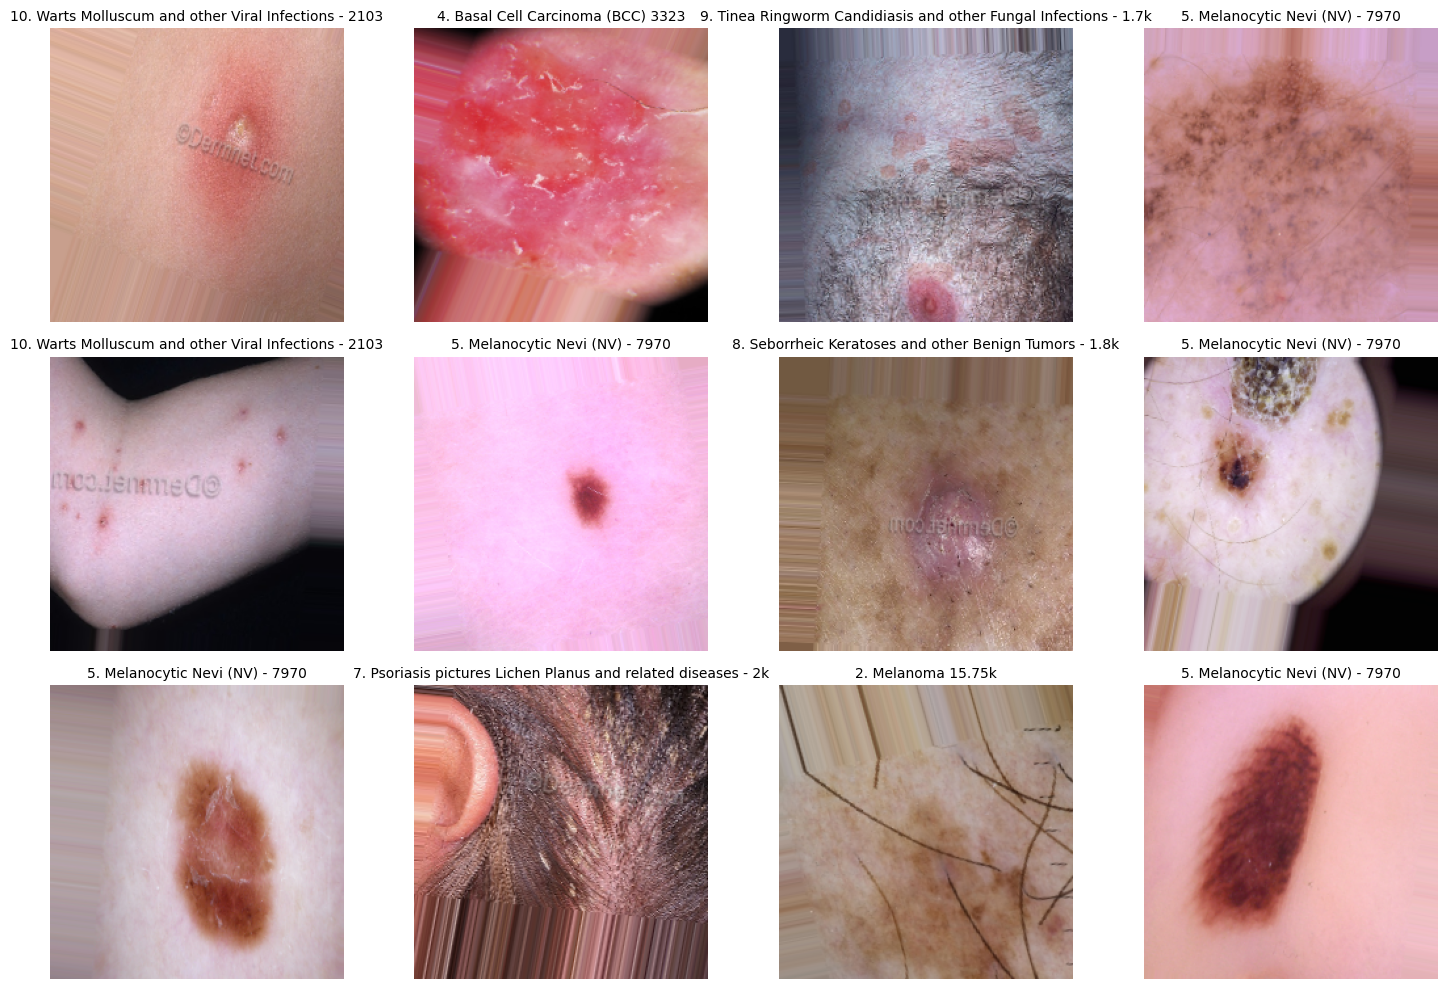

In [8]:
def plot_sample_images(generator, class_names):
    """Hiển thị một số ảnh mẫu từ generator"""
    plt.figure(figsize=(15, 10))

    # Lấy một batch ảnh
    images, labels = next(generator)


    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        label_idx = np.argmax(labels[i])
        plt.title(f'{class_names[label_idx]}', fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# # Hiển thị ảnh từ training set
plot_sample_images(train_generator, class_names)

#BUILD MODEL CNN


In [19]:
def create_cnn_model(input_shape=(224, 224, 3), num_classes=NUM_CLASSES):
    model = keras.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape), #32 filter (3x3) -> 2D ,relu(phi tuyến) bỏ âm , same -> tránh mất pixel khi tích chập
        layers.BatchNormalization(),  #Theo lô
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2), #giảm 1/2 size
        layers.Dropout(0.25), #bỏ 25% neuron -> trình overfitting

        # Block 2 -> về block sau tăng filter học sâu
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        # Fully Connected -> Như Deep Learning
        layers.Flatten(), #2D -> 1D
        layers.Dense(512, activation='relu'), #Them 512 neuron
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax') #số loại đầu ra , đầu ra theo xác suất từng lớp
    ])

    return model

# Tạo model
model = create_cnn_model()

#Architecture model

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,003,690 (103.01 MB)

 Trainable params: 27,000,234 (103.00 MB)

 Non-trainable params: 3,456 (13.50 KB)

#Callback ngay khi overfitting hoặc không cải thiện được accuracy nữa

In [21]:

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_skin_disease_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

#Thực hiện Train MODEL

In [22]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4202 - loss: 1.8961
Epoch 1: val_accuracy improved from -inf to 0.16198, saving model to best_skin_disease_model.h5


272/272 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.4204 - loss: 1.8950 - val_accuracy: 0.1620 - val_loss: 2.2464 - learning_rate: 0.0010
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5274 - loss: 1.2709
Epoch 2: val_accuracy did not improve from 0.16198
272/272 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.5275 - loss: 1.2708 - val_accuracy: 0.1369 - val_loss: 3.8624 - learning_rate: 0.0010
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5638 - loss: 1.1541
Epoch 3: val_accuracy improved from 0.16198 to 0.30899, saving model to best_skin_disease_model.h5


272/272 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.5638 - loss: 1.1541 - val_accuracy: 0.3090 - val_loss: 2.3558 - learning_rate: 0.0010
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5807 - loss: 1.1045
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 4: val_accuracy did not improve from 0.30899
272/272 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.5807 - loss: 1.1044 - val_accuracy: 0.0924 - val_loss: 6.5838 - learning_rate: 0.0010
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6113 - loss: 0.9970
Epoch 5: val_accuracy did not improve from 0.30899
272/272 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.6113 - loss: 0.9970 - val_accuracy: 0.2230 - val_loss: 3.3734 - learning_rate: 5.0000e-04
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6169 - loss: 0.9884
Epoch 6: val_accuracy did not improve from 0.30899
272/272 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.6169 - loss: 0.9884 - val_acc

272/272 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.6343 - loss: 0.9366 - val_accuracy: 0.3175 - val_loss: 2.0557 - learning_rate: 5.0000e-04
Epoch 9/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6427 - loss: 0.9264
Epoch 9: val_accuracy did not improve from 0.31751
272/272 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.6427 - loss: 0.9264 - val_accuracy: 0.3092 - val_loss: 2.1315 - learning_rate: 5.0000e-04
Epoch 10/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6436 - loss: 0.9190
Epoch 10: val_accuracy did not improve from 0.31751
272/272 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.6436 - loss: 0.9190 - val_accuracy: 0.2664 - val_loss: 2.3343 - learning_rate: 5.0000e-04
Epoch 11/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6568 - loss: 0.8791
Epoch 11: val_accuracy improved from 0.31751 to 0.32719, saving model to best_skin_disease_model.h5


272/272 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.6567 - loss: 0.8791 - val_accuracy: 0.3272 - val_loss: 2.0493 - learning_rate: 5.0000e-04
Epoch 12/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6557 - loss: 0.8737
Epoch 12: val_accuracy improved from 0.32719 to 0.36267, saving model to best_skin_disease_model.h5


272/272 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.6557 - loss: 0.8736 - val_accuracy: 0.3627 - val_loss: 2.1129 - learning_rate: 5.0000e-04
Epoch 13/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6650 - loss: 0.8542
Epoch 13: val_accuracy did not improve from 0.36267
272/272 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.6650 - loss: 0.8542 - val_accuracy: 0.3200 - val_loss: 2.2530 - learning_rate: 5.0000e-04
Epoch 14/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6701 - loss: 0.8351
Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 14: val_accuracy did not improve from 0.36267
272/272 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.6700 - loss: 0.8352 - val_accuracy: 0.3122 - val_loss: 2.1315 - learning_rate: 5.0000e-04
Epoch 15/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6842 - loss: 0.8111
Epoch 15: val_accuracy did not improve from 0.36267
272/272 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.6842 - loss: 0

272/272 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.6936 - loss: 0.7736 - val_accuracy: 0.4152 - val_loss: 1.8698 - learning_rate: 2.5000e-04
Epoch 17/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7005 - loss: 0.7596
Epoch 17: val_accuracy did not improve from 0.41521
272/272 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.7005 - loss: 0.7596 - val_accuracy: 0.3235 - val_loss: 2.6708 - learning_rate: 2.5000e-04
Epoch 18/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7067 - loss: 0.7419
Epoch 18: val_accuracy improved from 0.41521 to 0.44816, saving model to best_skin_disease_model.h5


272/272 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.7067 - loss: 0.7419 - val_accuracy: 0.4482 - val_loss: 1.8567 - learning_rate: 2.5000e-04
Epoch 19/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7024 - loss: 0.7536
Epoch 19: val_accuracy did not improve from 0.44816
272/272 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.7024 - loss: 0.7536 - val_accuracy: 0.4263 - val_loss: 1.8049 - learning_rate: 2.5000e-04
Epoch 20/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7147 - loss: 0.7225
Epoch 20: val_accuracy did not improve from 0.44816
272/272 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.7147 - loss: 0.7226 - val_accuracy: 0.3988 - val_loss: 2.6071 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 18.
